<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/lung%20cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [3]:
data=pd.read_csv("/content/thirddatasetdata1.csv")

In [4]:
data['Label'].value_counts()

adeno       128
squamous     61
other        34
Name: Label, dtype: int64

In [5]:
data.columns

Index(['ID', 'imaging.radiomics.GLCM_autocorr',
       'imaging.radiomics.GLCM_clusProm', 'imaging.radiomics.GLCM_clusShade',
       'imaging.radiomics.GLCM_clusTend', 'imaging.radiomics.GLCM_contrast',
       'imaging.radiomics.GLCM_correl1', 'imaging.radiomics.GLCM_diffEntro',
       'imaging.radiomics.GLCM_dissimilar', 'imaging.radiomics.GLCM_energy',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var', 'Label'],
      dtype='object', length=638)

In [6]:
data_real = data.replace(np.inf, np.nan)

In [7]:
data_real.isnull().sum().sum()

100

In [8]:
data_df = data_real.dropna(axis=0)

In [9]:
data_df.isnull().sum().sum()

0

In [10]:
data_df

,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,Label
0,1,453.182272,104777.28120,674.017890,222.638902,27.372666,0.781116,2.392952,4.064393,0.002345,...,1662.196015,467.866888,2602.393670,1817.531872,0.289817,558.438821,1.676156e+10,0.035583,311853.91710,adeno
1,2,528.315776,4260.94238,-216.316062,19.065842,5.393669,0.612640,1.524119,1.302619,0.113870,...,2982.188746,1371.523763,1961.257947,2905.312685,-2.215156,216.035768,3.254789e+10,0.237286,46671.45319,squamous
2,3,1127.285945,113572.19180,-1876.394931,160.306058,35.961316,0.630446,2.435402,3.931714,0.008031,...,2979.224981,643.909824,3576.484800,2846.375865,-0.924287,522.757809,7.111809e+10,0.057868,273275.72710,other
3,4,1168.460376,64098.28992,-1848.600663,91.839214,17.133651,0.682034,1.988541,2.409581,0.036164,...,2988.358359,711.386506,3196.094809,2832.966683,-1.833313,406.914394,2.640000e+11,0.136353,165579.32370,adeno
4,5,714.993885,42488.22647,-1328.998406,93.896236,20.667403,0.632109,2.188704,2.960161,0.030619,...,2919.649317,1004.777916,2547.097206,2762.306176,-1.157273,443.861554,2.112840e+10,0.099191,197013.07940,adeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1139.334792,14516.60896,244.741173,46.462792,16.106440,0.482397,1.983495,2.391288,0.022039,...,3055.887195,1112.092053,3328.668697,3101.039311,-0.426993,316.952421,8.079737e+10,0.111039,100458.83710,squamous
219,220,818.698358,87742.27268,-2055.586897,157.898761,23.252008,0.742900,2.265772,3.303056,0.009143,...,2797.141552,869.433409,2899.659059,2699.092216,-0.864501,499.276162,5.765427e+10,0.051432,249276.68600,squamous
220,221,801.695540,76994.34218,-2098.066288,132.491348,18.352911,0.753683,2.121198,2.716123,0.020977,...,3052.583286,1007.135169,2617.232001,2891.348422,-1.185849,477.287930,1.590000e+11,0.074412,227803.76820,adeno
221,222,341.806330,29115.57843,-784.954552,101.804686,19.284936,0.702816,2.202712,3.313602,0.009943,...,2565.730869,1397.617681,1740.429212,2515.580119,-0.602095,427.360059,2.505945e+09,0.050645,182636.61980,adeno


In [11]:
data_X = data_df.drop(['Label'], axis = 1)

In [12]:
data_X.columns 

Index(['ID', 'imaging.radiomics.GLCM_autocorr',
       'imaging.radiomics.GLCM_clusProm', 'imaging.radiomics.GLCM_clusShade',
       'imaging.radiomics.GLCM_clusTend', 'imaging.radiomics.GLCM_contrast',
       'imaging.radiomics.GLCM_correl1', 'imaging.radiomics.GLCM_diffEntro',
       'imaging.radiomics.GLCM_dissimilar', 'imaging.radiomics.GLCM_energy',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_mean',
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var'],
      dtype='object', length=637)

In [13]:
data_df.isnull().sum().sum()

0

In [14]:
data_y = data_df['Label']

label encode

In [15]:
from sklearn.preprocessing import LabelEncoder 

In [16]:
le = LabelEncoder()

In [17]:
data_y_trans = le.fit_transform(data_y)
le_fid = LabelEncoder()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y, train_size = 0.7)

In [19]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [64]:

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [99]:
df.loc[:, df.columns != 'Label']


,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
0,1,453.182272,104777.28120,674.017890,222.638902,27.372666,0.781116,2.392952,4.064393,0.002345,...,1729.632808,1662.196015,467.866888,2602.393670,1817.531872,0.289817,558.438821,1.676156e+10,0.035583,311853.91710
1,2,528.315776,4260.94238,-216.316062,19.065842,5.393669,0.612640,1.524119,1.302619,0.113870,...,2897.271552,2982.188746,1371.523763,1961.257947,2905.312685,-2.215156,216.035768,3.254789e+10,0.237286,46671.45319
2,3,1127.285945,113572.19180,-1876.394931,160.306058,35.961316,0.630446,2.435402,3.931714,0.008031,...,2797.965505,2979.224981,643.909824,3576.484800,2846.375865,-0.924287,522.757809,7.111809e+10,0.057868,273275.72710
3,4,1168.460376,64098.28992,-1848.600663,91.839214,17.133651,0.682034,1.988541,2.409581,0.036164,...,2803.591612,2988.358359,711.386506,3196.094809,2832.966683,-1.833313,406.914394,2.640000e+11,0.136353,165579.32370
4,5,714.993885,42488.22647,-1328.998406,93.896236,20.667403,0.632109,2.188704,2.960161,0.030619,...,2726.425036,2919.649317,1004.777916,2547.097206,2762.306176,-1.157273,443.861554,2.112840e+10,0.099191,197013.07940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1139.334792,14516.60896,244.741173,46.462792,16.106440,0.482397,1.983495,2.391288,0.022039,...,3084.801116,3055.887195,1112.092053,3328.668697,3101.039311,-0.426993,316.952421,8.079737e+10,0.111039,100458.83710
219,220,818.698358,87742.27268,-2055.586897,157.898761,23.252008,0.742900,2.265772,3.303056,0.009143,...,2652.518351,2797.141552,869.433409,2899.659059,2699.092216,-0.864501,499.276162,5.765427e+10,0.051432,249276.68600
220,221,801.695540,76994.34218,-2098.066288,132.491348,18.352911,0.753683,2.121198,2.716123,0.020977,...,2851.684399,3052.583286,1007.135169,2617.232001,2891.348422,-1.185849,477.287930,1.590000e+11,0.074412,227803.76820
221,222,341.806330,29115.57843,-784.954552,101.804686,19.284936,0.702816,2.202712,3.313602,0.009943,...,2479.106274,2565.730869,1397.617681,1740.429212,2515.580119,-0.602095,427.360059,2.505945e+09,0.050645,182636.61980


In [116]:
df = pd.read_csv('/content/thirddatasetdata1.csv')
df['Label'].replace(['adeno', 'squamous','other'],
                        [0, 1,2], inplace=True)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))
df

MinMaxScaler()


,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,Label
0,1,453.182272,104777.28120,674.017890,222.638902,27.372666,0.781116,2.392952,4.064393,0.002345,...,1662.196015,467.866888,2602.393670,1817.531872,0.289817,558.438821,1.676156e+10,0.035583,311853.91710,0
1,2,528.315776,4260.94238,-216.316062,19.065842,5.393669,0.612640,1.524119,1.302619,0.113870,...,2982.188746,1371.523763,1961.257947,2905.312685,-2.215156,216.035768,3.254789e+10,0.237286,46671.45319,1
2,3,1127.285945,113572.19180,-1876.394931,160.306058,35.961316,0.630446,2.435402,3.931714,0.008031,...,2979.224981,643.909824,3576.484800,2846.375865,-0.924287,522.757809,7.111809e+10,0.057868,273275.72710,2
3,4,1168.460376,64098.28992,-1848.600663,91.839214,17.133651,0.682034,1.988541,2.409581,0.036164,...,2988.358359,711.386506,3196.094809,2832.966683,-1.833313,406.914394,2.640000e+11,0.136353,165579.32370,0
4,5,714.993885,42488.22647,-1328.998406,93.896236,20.667403,0.632109,2.188704,2.960161,0.030619,...,2919.649317,1004.777916,2547.097206,2762.306176,-1.157273,443.861554,2.112840e+10,0.099191,197013.07940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1139.334792,14516.60896,244.741173,46.462792,16.106440,0.482397,1.983495,2.391288,0.022039,...,3055.887195,1112.092053,3328.668697,3101.039311,-0.426993,316.952421,8.079737e+10,0.111039,100458.83710,1
219,220,818.698358,87742.27268,-2055.586897,157.898761,23.252008,0.742900,2.265772,3.303056,0.009143,...,2797.141552,869.433409,2899.659059,2699.092216,-0.864501,499.276162,5.765427e+10,0.051432,249276.68600,1
220,221,801.695540,76994.34218,-2098.066288,132.491348,18.352911,0.753683,2.121198,2.716123,0.020977,...,3052.583286,1007.135169,2617.232001,2891.348422,-1.185849,477.287930,1.590000e+11,0.074412,227803.76820,0
221,222,341.806330,29115.57843,-784.954552,101.804686,19.284936,0.702816,2.202712,3.313602,0.009943,...,2565.730869,1397.617681,1740.429212,2515.580119,-0.602095,427.360059,2.505945e+09,0.050645,182636.61980,0


In [117]:
chi2_features=SelectKBest(chi2,k=10)
X_kbest_features=chi2_features.fit_transform(data_X,data_y_trans)

ValueError: ignored

In [63]:
test = SelectKBest()
fit = test.fit(data_X,data_y_trans)
fit.scores_
test.feature_selection

AttributeError: ignored

In [22]:
model.feature_importances_

array([0.0025665 , 0.00449137, 0.00305192, 0.0042389 , 0.00213723,
       0.00150752, 0.00182956, 0.00203976, 0.00180564, 0.00203738,
       0.00176849, 0.00139935, 0.00079668, 0.0014359 , 0.00120908,
       0.00146851, 0.00100296, 0.00168372, 0.00124907, 0.00287121,
       0.00101235, 0.00378006, 0.00376483, 0.00098539, 0.00189684,
       0.00255625, 0.00100469, 0.00227   , 0.00088705, 0.00243964,
       0.00141904, 0.00121491, 0.00154016, 0.00176071, 0.00079697,
       0.0006293 , 0.00155364, 0.00077311, 0.00110319, 0.00210031,
       0.00154094, 0.00028248, 0.00130133, 0.00064753, 0.00159252,
       0.00151679, 0.00066607, 0.00053493, 0.00029114, 0.00044914,
       0.00182248, 0.00090208, 0.00091537, 0.00144565, 0.00064331,
       0.00138023, 0.00058172, 0.00143675, 0.00138985, 0.00039907,
       0.00128283, 0.00070767, 0.0010715 , 0.00105458, 0.00137652,
       0.0008014 , 0.0024092 , 0.00152024, 0.00089908, 0.00124868,
       0.00066972, 0.0009501 , 0.00118501, 0.00147671, 0.00121

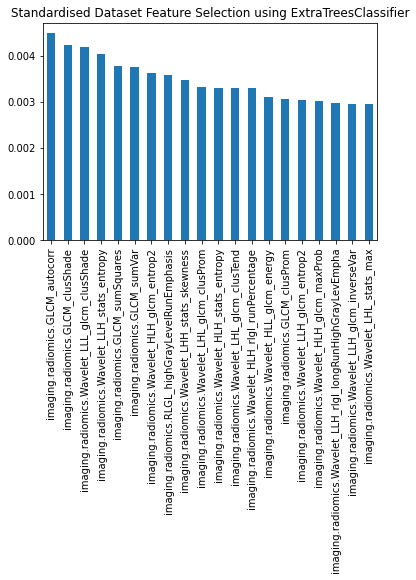

In [23]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_new_10features_X = data_X[['imaging.radiomics.GLCM_autocorr','imaging.radiomics.GLCM_clusShade','imaging.radiomics.GLCM_clusTend','imaging.radiomics.Wavelet_LLH_stats_entropy','imaging.radiomics.GLCM_sumSquares','imaging.radiomics.GLCM_sumVar','imaging.radiomics.Wavelet_HLH_glcm_entrop2','imaging.radiomics.RLGL_highGrayLevelRunEmphasis','imaging.radiomics.Wavelet_LHH_stats_skewness','imaging.radiomics.Wavelet_LHL_glcm_clusProm','imaging.radiomics.Wavelet_LLL_glcm_clusShade','imaging.radiomics.Wavelet_HLH_stats_entropy','imaging.radiomics.Wavelet_LHL_glcm_clusTend','imaging.radiomics.Wavelet_HLH_rlgl_runPercentage','imaging.radiomics.Wavelet_HLL_glcm_energy','imaging.radiomics.GLCM_clusProm','imaging.radiomics.Wavelet_LLH_glcm_entrop2','imaging.radiomics.Wavelet_HLH_glcm_maxProb','imaging.radiomics.Wavelet_LLH_rlgl_longRunHighGrayLevEmpha','imaging.radiomics.Wavelet_LLH_glcm_inverseVar','imaging.radiomics.Wavelet_LHL_stats_max']]

In [ ]:
data_new_10features_X

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.Wavelet_LLH_stats_entropy,imaging.radiomics.GLCM_sumSquares,imaging.radiomics.GLCM_sumVar,imaging.radiomics.Wavelet_HLH_glcm_entrop2,imaging.radiomics.RLGL_highGrayLevelRunEmphasis,imaging.radiomics.Wavelet_LHH_stats_skewness,imaging.radiomics.Wavelet_LHL_glcm_clusProm,...,imaging.radiomics.Wavelet_HLH_stats_entropy,imaging.radiomics.Wavelet_LHL_glcm_clusTend,imaging.radiomics.Wavelet_HLH_rlgl_runPercentage,imaging.radiomics.Wavelet_HLL_glcm_energy,imaging.radiomics.GLCM_clusProm,imaging.radiomics.Wavelet_LLH_glcm_entrop2,imaging.radiomics.Wavelet_HLH_glcm_maxProb,imaging.radiomics.Wavelet_LLH_rlgl_longRunHighGrayLevEmpha,imaging.radiomics.Wavelet_LLH_glcm_inverseVar,imaging.radiomics.Wavelet_LHL_stats_max
0,453.182272,674.017890,222.638902,4.184232,466.114347,1530.579200,4.961172,421.474854,0.096637,16230.695420,...,3.695156,60.363203,0.895834,0.008015,104777.28120,5.532759,0.027893,659.585864,0.259748,283.446882
1,528.315776,-216.316062,19.065842,3.126100,528.482879,1910.687899,3.743206,492.508799,0.000539,2954.436039,...,2.895309,23.890188,0.775575,0.091817,4260.94238,3.812792,0.123893,713.861456,0.400256,332.810088
2,1127.285945,-1876.394931,160.306058,3.879547,1144.810450,4062.139544,4.865590,1081.463085,0.011323,24126.276730,...,3.776169,55.287428,0.843297,0.011378,113572.19180,4.798817,0.069279,2013.962799,0.345095,870.291560
3,1168.460376,-1848.600663,91.839214,3.017491,1176.937652,4285.014465,3.661502,1099.374957,-0.099803,4008.213707,...,2.853552,17.353494,0.702128,0.042909,64098.28992,3.749789,0.227006,1912.925956,0.398879,837.449547
4,714.993885,-1328.998406,93.896236,3.635205,727.790602,2548.161191,4.513348,635.117375,0.700907,7048.247155,...,3.575097,36.458096,0.829402,0.009389,42488.22647,4.335352,0.080336,1030.363053,0.321485,387.844602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1139.334792,244.741173,46.462792,3.154861,1144.152978,4167.712799,4.490934,1164.043059,0.409336,9696.672076,...,3.572605,23.783007,0.828750,0.057848,14516.60896,3.812587,0.100593,1465.301957,0.385316,1089.816349
219,818.698358,-2055.586897,157.898761,4.209590,826.485956,2894.242678,4.704699,750.638244,0.143632,6388.441034,...,3.640349,28.554553,0.835433,0.015457,87742.27268,5.293237,0.075122,650.266265,0.306177,313.307670
220,801.695540,-2098.066288,132.491348,3.691867,810.785283,2851.333221,4.127989,712.023516,-0.029171,3722.175215,...,3.178551,24.443465,0.760425,0.028768,76994.34218,4.620957,0.102555,994.699558,0.346085,441.659694
221,341.806330,-784.954552,101.804686,3.602954,361.586288,1147.176000,4.225731,306.120848,-0.132470,8344.665058,...,3.397280,43.066695,0.885781,0.015510,29115.57843,4.310492,0.051887,150.217956,0.325521,194.248668


In [ ]:
from sklearn.model_selection import train_test_split
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(data_new_10features_X, data_y_trans, train_size = 0.8)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_10 = StandardScaler()
X_train_std_10 = ss_10.fit_transform(X_train_10)
X_test_std_10 = ss_10.fit_transform(X_test_10)

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_10, y_train_10)

RandomForestClassifier()

In [ ]:
rf_y_pred = rf.predict(X_test_std_10)

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
acc_score = accuracy_score(y_test_10, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 57.77777777777777


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ml_dec = DecisionTreeClassifier()

In [ ]:
ml_dec.fit(X_train_std_10, y_train_10)

DecisionTreeClassifier()

In [ ]:
res_dec=ml_dec.predict(X_test_std_10)

In [ ]:
accuracy_1=accuracy_score(y_test_10,res_dec)
print("Decision tree :",accuracy_1*100)

Decision tree : 44.44444444444444


XG Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train_std_10, y_train_10)

GradientBoostingClassifier()

In [ ]:
res_xg=gradient_boost.predict(X_test_std_10)

In [ ]:
acc_score_xg = accuracy_score(y_test_10, res_xg)
print("Accuracy Score for GradientBoosting: \n", acc_score_xg*100)

Accuracy Score for GradientBoosting: 
 64.44444444444444


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_std_10, y_train_10)
gnb_y_pred = gnb.predict(X_test_std_10)

In [ ]:
acc_score_gnb = accuracy_score(y_test_10, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 57.77777777777777


SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
y_pred_svm = svm.predict(X_test_std_10) 
svm.score(X_test_std_10, y_test_10)

0.6222222222222222

In [ ]:
acc_score_svm = accuracy_score(y_test_10, y_pred_svm)
print("Accuracy Score for SVM: \n", acc_score_svm*100)

Accuracy Score for SVM: 
 62.22222222222222
